**Heart Disease Analysis**

<img src="https://img.timesnownews.com/story/1527685506-hd.PNG?d=600x450" width="500px"/>

**Introduction**
<br>
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

**Goals**<br>
Here, we will try to find possibility of affected by heart disease based on sex, age, fbs.

**Attribute or Dataset Columns Feature Information**
1. ageage in years
2. sex(1 = male; 0 = female)
3. cpchest pain type
4. trestbpsresting blood pressure (in mm Hg on admission to the hospital)
5. cholserum cholestoral in mg/dl
6. fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecgresting electrocardiographic results
8. thalachmaximum heart rate achieved
9. exangexercise induced angina (1 = yes; 0 = no)
10. oldpeakST depression induced by exercise relative to rest
11. slopethe slope of the peak exercise ST segment
12. canumber of major vessels (0-3) colored by flourosopy
13. thal3 = normal; 6 = fixed defect; 7 = reversable defect
14. target1 or 0

**If you totally new in Kaggle, then I would like to recommend you to see this course.**<br>
Faster Data Science Education,
Link: https://www.kaggle.com/learn/overview

**Import Libraries**<br>
First, I import necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
%matplotlib inline


**Read Data**<br>
Now, we are loading our dataset to the df variable using **read_csv** (because our dataset in csv format) funcation.

In [2]:
df = pd.read_csv('../input/heart-disease-uci/heart.csv')

**Let's take a look to our loaded dataset**

Print first five rows of our loaded data.

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Print last five rows of loades data

In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


**Let's check the size of our loaded data**

In [5]:
df.shape

(303, 14)

(303, 14) means our loaded data have 303 rows and 14 columns.

**Let's show the headers or columns name**

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Let's show loaded data info**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Let's describe our loaded data**

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The features described in the above data set are:

1. **Count** tells us the number of NoN-empty rows in a feature.

2. **Mean** tells us the mean value of that feature.

3. **Std** tells us the Standard Deviation Value of that feature.

4. **Min** tells us the minimum value of that feature.

5. **25%, 50%, and 75%** are the percentile/quartile of each features.

6. **Max** tells us the maximum value of that feature.

**Let's check if there any null value in loaded data**

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no null values in our loaded data.

**Visualization of loaded data**

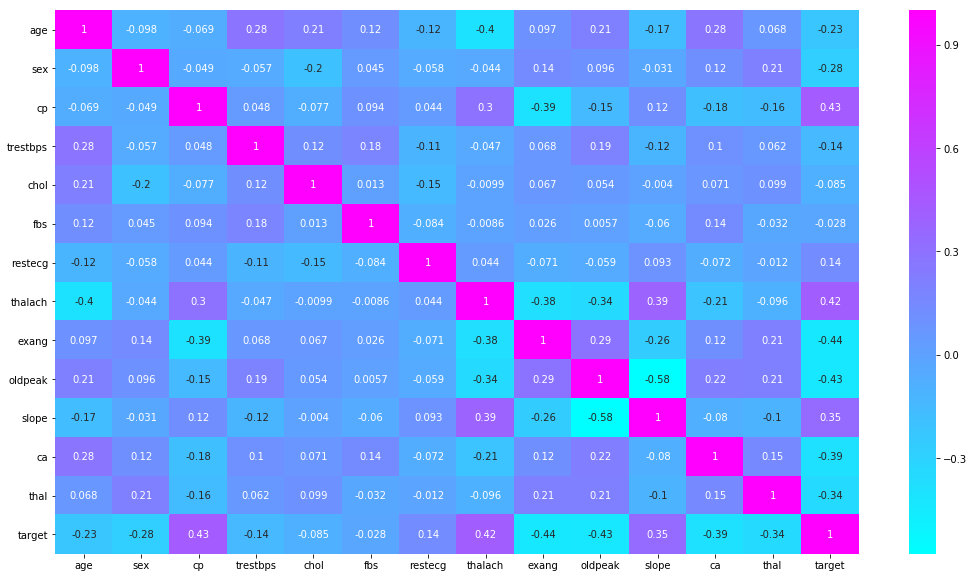

In [10]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot = True, cmap='cool')
plt.show()

**Let's analyze Sex of the loaded data.**

In [11]:
print(len(df.sex))

303


Number of total genders are 303.

In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

Here, 1 means male and 0 means female. So, number of males and females are 207, 96.

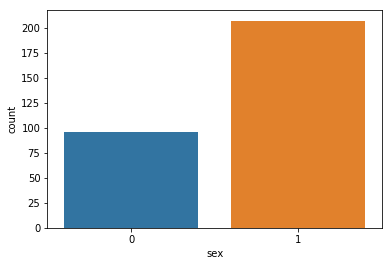

In [13]:
sns.countplot(df.sex)
plt.show()

0 means female, 1 means male.

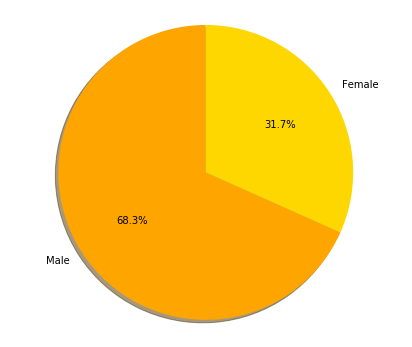

In [14]:
male = len(df[df['sex'] == 1])
female = len(df[df['sex'] == 0])
plt.figure(figsize=(7, 6))

labels = 'Male', 'Female'
sizes = [male, female]
colors = ['orange', 'gold']
explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

Here, 68.3% are male and 31.7% are female in the loaded dataset.

**Let's check male heart situation.**

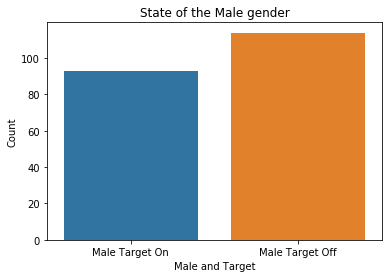

In [15]:
male_1 = len(df[(df.sex == 1) & (df['target'] == 1)])
male_0 = len(df[(df.sex == 1) & (df['target'] == 0)])
sns.barplot(x = ['Male Target On', 'Male Target Off'], y = [male_1, male_0])
plt.xlabel('Male and Target')
plt.ylabel('Count')
plt.title('State of the Male gender')
plt.show()

**From above, we can say that male is less affected by heart diseases.**

**Let's check female heart situation.**

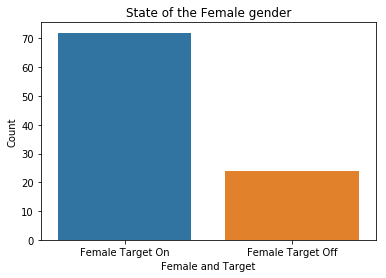

In [16]:
female_1 = len(df[(df.sex == 0) & (df['target'] == 1)])
female_0 = len(df[(df.sex == 0) & (df['target'] == 0)])

sns.barplot(x = ['Female Target On', 'Female Target Off'], y = [female_1, female_0])
plt.xlabel('Female and Target')
plt.ylabel('Count')
plt.title('State of the Female gender')
plt.show()

**From above, we can say that female is more affected by heart diseases.**

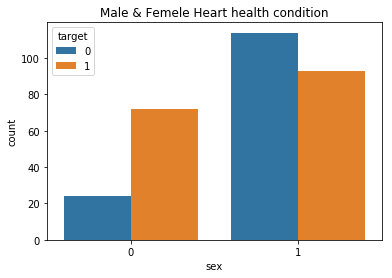

In [17]:
sns.countplot(df.sex, hue = df.target)
plt.title('Male & Femele Heart health condition')
plt.show()

From above output, we can again say that female are more affected and male are less affected by heart diseases.

**Let's see ratio of affected sex(gender).**

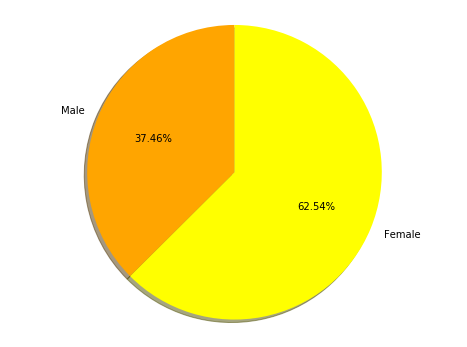

In [18]:
male = ((len(df[(df.sex == 1) & (df['target'] == 1)])) / len(df[df['sex'] == 1])) * 100
female = ((len(df[(df.sex == 0) & (df['target'] == 1)])) / len(df[df['sex'] == 0])) * 100
plt.figure(figsize=(8, 6))

labels = 'Male', 'Female'
sizes = [male, female]
colors = ['orange', 'yellow']
explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

**From above output, we see that 37.46% male and 62.54% female are affected by heart diseases.**

**Let's analyze the age.**

In [19]:
df['count'] = 1
df.groupby('age').count()['count']

age
29     1
34     2
35     4
37     2
38     3
39     4
40     3
41    10
42     8
43     8
44    11
45     8
46     7
47     5
48     7
49     5
50     7
51    12
52    13
53     8
54    16
55     8
56    11
57    17
58    19
59    14
60    11
61     8
62    11
63     9
64    10
65     8
66     7
67     9
68     4
69     3
70     4
71     3
74     1
76     1
77     1
Name: count, dtype: int64

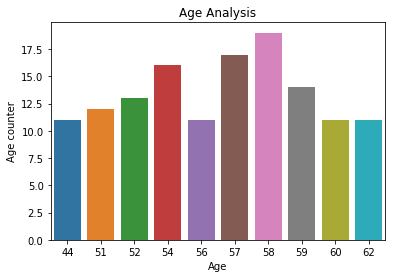

In [20]:
sns.barplot(x=df.age.value_counts()[:10].index,y=df.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age counter')
plt.title('Age Analysis')
plt.show()

In [21]:
print('Min age:', min(df.age))
print('Max age:', max(df.age))
print('Mean age: ', df.age.mean())

Min age: 29
Max age: 77
Mean age:  54.366336633663366


**The human age is classified into four categories as Child (0-12 years), Adolescence (13-18 years), Adult (19-59 years) and Senior Adult (60 years and above).**<br>
As there min or lawest age is 29, so we can divide age in two types.
1. Adult
2. Senior adult

In [22]:
print('Total adult people: ', len(df[(df.age >= 29) & (df.age <= 59)]))
print('Total senior adult people: ', len(df[(df.age > 59)]))

Total adult people:  213
Total senior adult people:  90


**Let's find the ratio of adult and senior adult.**

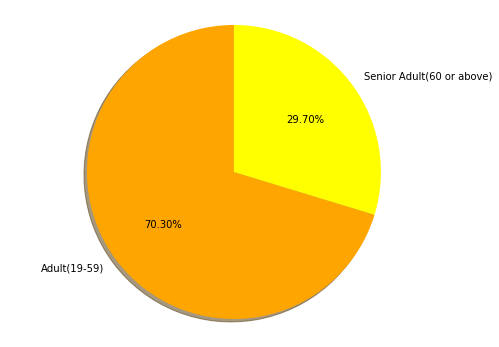

In [23]:
adult0 = ((len(df[(df.age >= 29) & (df.age <= 59)])) / len(df['age'])) * 100
senior0 = ((len(df[(df.age > 59)])) / len(df['age'])) * 100
plt.figure(figsize=(8, 6))

labels = 'Adult(19-59)', 'Senior Adult(60 or above)'
sizes = [adult0, senior0]
colors = ['orange', 'yellow']
explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

Here, 70.30% adult and 29.70% are senior adult.

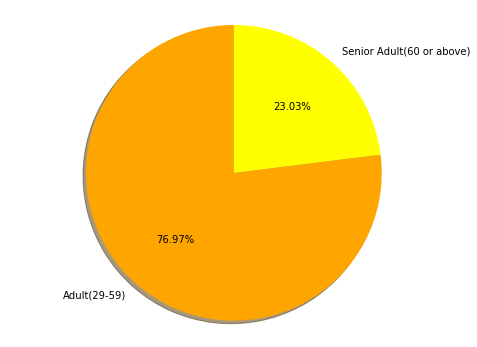

In [24]:
adult1 = ((len(df[(df.age >= 29) & (df.age <= 59) & (df['target'] == 1)])) / len(df['age'])) * 100
senior1 = ((len(df[(df.age > 59) & (df['target'] == 1)])) / len(df['age'])) * 100
plt.figure(figsize=(8, 6))

labels = 'Adult(29-59)', 'Senior Adult(60 or above)'
sizes = [adult1, senior1]
colors = ['orange', 'yellow']
explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

**76.97% of adult and 23.03% senior adult are affected by heart diseases.**

**Let's analyze age and sex together.**

**Male**

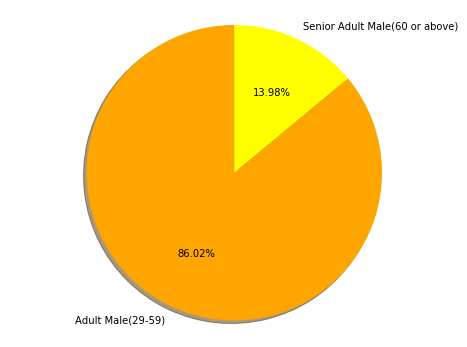

In [25]:
adult2 = ((len(df[(df.sex == 1) & (df.age >= 29) & (df.age <= 59) & (df['target'] == 1)])) / len(df['age'])) * 100
senior2 = ((len(df[(df.sex == 1) & (df.age > 59) & (df['target'] == 1)])) / len(df['age'])) * 100
plt.figure(figsize=(8, 6))

labels = 'Adult Male(29-59)', 'Senior Adult Male(60 or above)'
sizes = [adult2, senior2]
colors = ['orange', 'yellow']
explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

**86.02 % adult male and 13.98% senior adult affected by heart diseases.**

**Female**

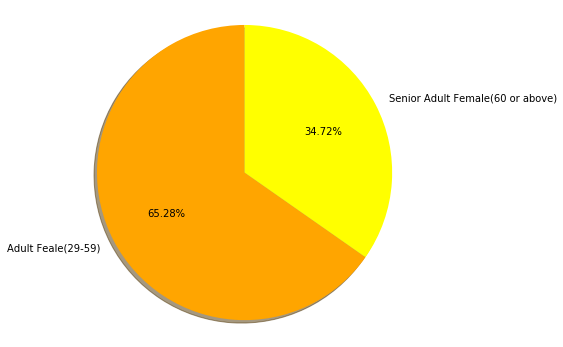

In [26]:
adult3 = ((len(df[(df.sex == 0) & (df.age >= 29) & (df.age <= 59) & (df['target'] == 1)])) / len(df['age'])) * 100
senior3 = ((len(df[(df.sex == 0) & (df.age > 59) & (df['target'] == 1)])) / len(df['age'])) * 100
plt.figure(figsize=(8, 6))

labels = 'Adult Feale(29-59)', 'Senior Adult Female(60 or above)'
sizes = [adult3, senior3]
colors = ['orange', 'yellow']
explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

**65.28% adult female and 34.72% senior adult female are afftected by heart diseases.**

**Let's analyze FBS or fasting blood sugar.**<br>
If a person have fasting blood sugar more than 120 mg/dl, then he or she is considered as with diabetes.

In [27]:
df['fbs']

0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: fbs, Length: 303, dtype: int64

In [28]:
print('Total people with diabetes: ', len(df[(df.fbs == 1)]))
print('Total people without diabetes: ', len(df[(df.fbs == 0)]))

Total people with diabetes:  45
Total people without diabetes:  258


**Let's find the ratio of diabetes and no diabetes.**

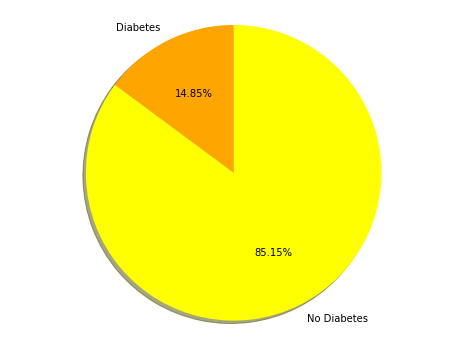

In [29]:
with_diabetes = (len(df[(df.fbs == 1)]) / len(df['fbs'])) * 100
without_diabetes =  (len(df[(df.fbs == 0)]) / len(df['fbs'])) * 100
plt.figure(figsize=(8, 6))

labels = 'Diabetes', 'No Diabetes'
sizes = [with_diabetes, without_diabetes]
colors = ['orange', 'yellow']
explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

**In our loaded data, 14.85% people have diabetes and 85.15% have no diabetes.**

**Let's find out another ratio.**

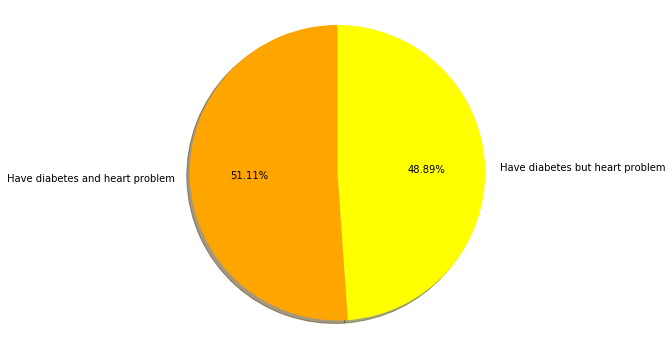

In [30]:
with_diabetes_on1 = (len(df[(df.fbs == 1) & (df['target'] == 1)]) / len(df['fbs'])) * 100
with_diabetes_off1 = (len(df[(df.fbs == 1) & (df['target'] == 0)]) / len(df['fbs'])) * 100
plt.figure(figsize=(8, 6))

labels = 'Have diabetes and heart problem', 'Have diabetes but heart problem'
sizes = [with_diabetes_on1, with_diabetes_off1]
colors = ['orange', 'yellow']
explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

**Here, 51.11% people have both diabetes and heart problem and 49.89% have diabetes but no heart problem.**

**Let's analyze sex, age, fbs, heart disease together.**

**Male**

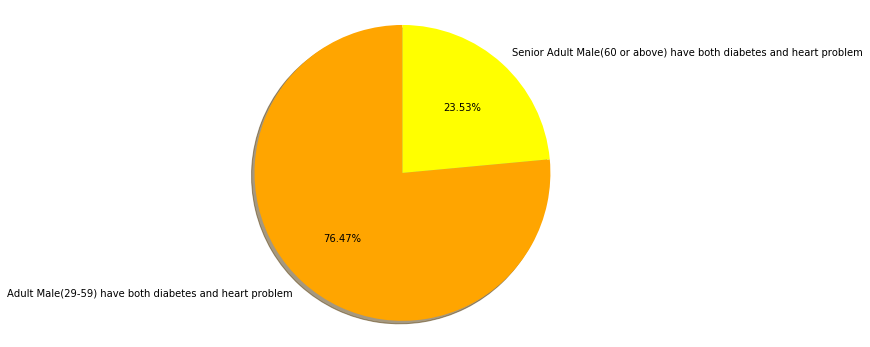

In [31]:
adult4 = ((len(df[(df.sex == 1) & (df.fbs == 1) & (df.age >= 29) & (df.age <= 59) & (df['target'] == 1)])) / len(df['age'])) * 100
senior4 = ((len(df[(df.sex == 1)  & (df.fbs == 1) & (df.age > 59) & (df['target'] == 1)])) / len(df['age'])) * 100
plt.figure(figsize=(8, 6))

labels = 'Adult Male(29-59) have both diabetes and heart problem', 'Senior Adult Male(60 or above) have both diabetes and heart problem'
sizes = [adult4, senior4]
colors = ['orange', 'yellow']
explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

**76.47% adult male(29-59) have both diabetes and heart problem and 23.53% senior adult male(60 or above) have both diabetes and heart problem.**

**Female**

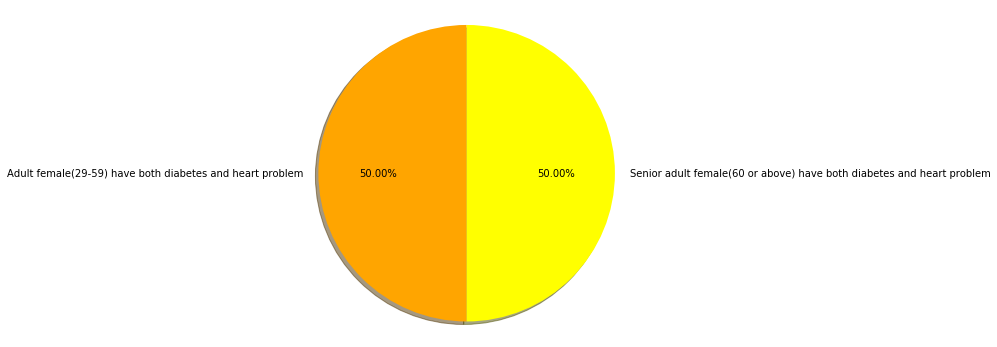

In [32]:
adult5 = ((len(df[(df.sex == 0) & (df.fbs == 1) & (df.age >= 29) & (df.age <= 59) & (df['target'] == 1)])) / len(df['age'])) * 100
senior5 = ((len(df[(df.sex == 0)  & (df.fbs == 1) & (df.age > 59) & (df['target'] == 1)])) / len(df['age'])) * 100
plt.figure(figsize=(8, 6))

labels = 'Adult female(29-59) have both diabetes and heart problem', 'Senior adult female(60 or above) have both diabetes and heart problem'
sizes = [adult5, senior5]
colors = ['orange', 'yellow']
explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

**50% of adult female and 50% of senior adult female have diabetes and heart problem together.**

**Male**

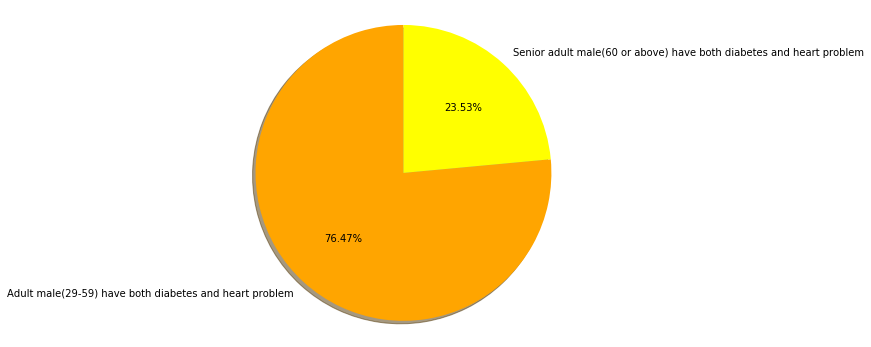

In [33]:
adult6 = ((len(df[(df.sex == 1) & (df.fbs == 1) & (df.age >= 29) & (df.age <= 59) & (df['target'] == 1)])) / len(df['age'])) * 100
senior6 = ((len(df[(df.sex == 1)  & (df.fbs == 1) & (df.age > 59) & (df['target'] == 1)])) / len(df['age'])) * 100
plt.figure(figsize=(8, 6))

labels = 'Adult male(29-59) have both diabetes and heart problem', 'Senior adult male(60 or above) have both diabetes and heart problem'
sizes = [adult6, senior6]
colors = ['orange', 'yellow']
explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

**76.47% of adult male and 23.53% of senior adult male have diabetes and heart problem together.**

**To be continued..!**